In [1]:
# Cargar archivo y contabilizar registros por año

import pandas as pd

# Cargar archivo 
df_pred = pd.read_csv("riesgo_desercion_2023_2024.csv")
print("Tamaño original df_pred:", df_pred.shape[0])

# Contar registros por año
conteo_por_anio = df_pred['Año'].value_counts().sort_index()

# Mostrar resultados
print("Conteo de registros por año:")
print(conteo_por_anio)

Tamaño original df_pred: 4682
Conteo de registros por año:
Año
2023    3938
2024     744
Name: count, dtype: int64


In [2]:
# Análisis descriptivo comparativo 

from IPython.display import display

# Definir categorizadas_existentes con las columnas categóricas del DataFrame
def obtener_columnas_categoricas(df):
    return df.select_dtypes(include=['object', 'category']).columns.tolist()

categorizadas_existentes = obtener_columnas_categoricas(df_pred)

# Asegurar que 'Año' no esté en categóricas
categorizadas_existentes = [col for col in categorizadas_existentes if col != 'Año']

# Calcular conteos para variables categóricas
conteos_categoricos = {}
for col in categorizadas_existentes:
    conteos = df_pred.groupby(['riesgo_predicho', col]).size().unstack(fill_value=0)
    conteos_categoricos[col] = conteos

# Calcular estadísticas numéricas por grupo de riesgo
variables_numericas = df_pred.select_dtypes(include=['float64', 'int64']).columns.tolist()
tabla_numerica = df_pred.groupby('riesgo_predicho')[variables_numericas].describe()

# Mostrar tabla de estadísticas numéricas
print("Estadísticas de variables numéricas por grupo de riesgo:")
display(tabla_numerica)

# Mostrar frecuencias categóricas por variable
for col, tabla in conteos_categoricos.items():
    print(f"\n Distribución de la variable categórica '{col}' por riesgo_predicho:")
    display(tabla)

Estadísticas de variables numéricas por grupo de riesgo:


EMPLID                                                  \
                  count           mean          std       min       25%   
riesgo_predicho                                                           
0                1917.0  258421.762650  5374.184206  249506.0  252936.0   
1                2765.0  259684.543942  5934.159772  114643.0  258149.0   

                                                  Año               ...  \
                      50%       75%       max   count         mean  ...   
riesgo_predicho                                                     ...   
0                258881.0  260159.0  272281.0  1917.0  2023.146583  ...   
1                259509.0  261291.0  272430.0  2765.0  2023.167450  ...   

                perception_economic_terms      job_opportunity            \
                                      75%  max           count      mean   
riesgo_predicho                                                            
0                                    0.25  1.0          1917.0  0.417319   
1                                    0.25  1.0          2765.0  0.521519   

                                                    
                      std  min  25%  50%  75%  max  
riesgo_predicho                                     
0                0.493245  0.0  0.0  0.0  1.0  1.0  
1                0.499627  0.0  0.0  1.0  1.0  1.0  

[2 rows x 576 columns]


 Distribución de la variable categórica 'CARRERA' por riesgo_predicho:


CARRERA,ARQ,IB,IBS,IC,ICA,IE,IELME,IEM,IIS,IL,...,LEI,LEIGI,LEM,LENF,LG,LPS,LTA,MVZ,PAAI,PADIN
riesgo_predicho,,,,,,,,,,,,,,,,,,,,,
0,125,73,40,52,10,19,37,111,242,9,...,51,1,25,41,28,180,17,96,2,1
1,100,21,86,74,16,20,36,110,299,27,...,144,12,26,116,94,259,22,62,1,7



 Distribución de la variable categórica 'AREA_CARRERA' por riesgo_predicho:


AREA_CARRERA,Business & Economics,Desconocido,Engineering and Technology,Natural Resources,Social Sciences and Humanities
riesgo_predicho,,,,,
0,394,83,851,259,330
1,655,37,970,345,758



 Distribución de la variable categórica 'CATEGORIA_CARRERA' por riesgo_predicho:


CATEGORIA_CARRERA,Aceptado,Condicionado
riesgo_predicho,,
0,1906,11
1,2765,0



 Distribución de la variable categórica 'NIVEL_CARRERA' por riesgo_predicho:


NIVEL_CARRERA,Associate degree,Bachelor's degree,Desconocido,Engineering program
riesgo_predicho,,,,
0,3,1057,11,846
1,8,1827,1,929


Conteo por año:
                 count
riesgo_predicho       
0                 1917
1                 2765

Porcentaje por año:
                     count
riesgo_predicho           
0                40.944041
1                59.055959
Conteo por año:
      No riesgo  Riesgo alto
Año                         
2023       1636         2302
2024        281          463

Porcentaje por año:
      No riesgo  Riesgo alto
Año                         
2023  41.543931    58.456069
2024  37.768817    62.231183


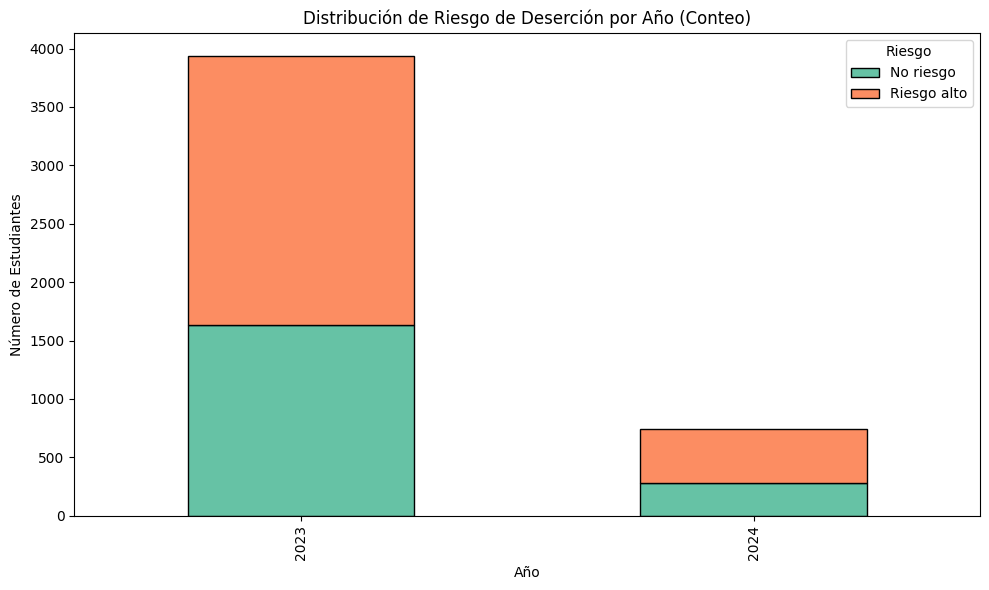

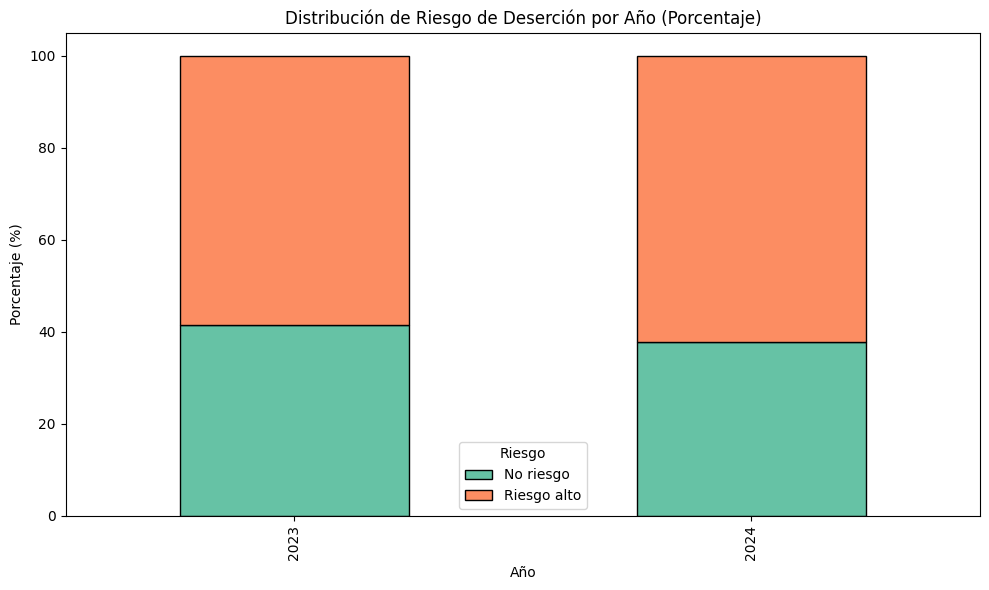

In [3]:
import matplotlib.pyplot as plt

# 3. Calcular conteo y porcentaje por año
# Arreglar el error: Asegurarse de que el índice sea MultiIndex antes de usar unstack
tabla = df_pred.groupby(['riesgo_predicho']).size().to_frame(name='count')

# Renombrar columnas para legibilidad (corrección: no es necesario renombrar aquí, ya que solo hay una columna)
# tabla.columns = ['No riesgo', 'Riesgo alto']

# Calcular porcentaje
tabla_pct = tabla.div(tabla.sum(axis=0), axis=1) * 100

# 4. Mostrar tabla resumen
print("Conteo por año:")
print(tabla)

print("\nPorcentaje por año:")
print(tabla_pct)

# 3. Calcular conteo y porcentaje por año para df_merged
tabla_por_anio = df_pred.groupby(['Año', 'riesgo_predicho']).size().unstack(fill_value=0)

# Renombrar columnas para legibilidad (corrección: verificar el número de columnas antes de renombrar)
tabla_por_anio.columns = ['No riesgo', 'Riesgo alto'] if tabla_por_anio.shape[1] == 2 else tabla_por_anio.columns

# Calcular porcentaje
tabla_por_anio_pct = tabla_por_anio.div(tabla_por_anio.sum(axis=1), axis=0) * 100

# 4. Mostrar tabla resumen
print("Conteo por año:")
print(tabla_por_anio)

print("\nPorcentaje por año:")
print(tabla_por_anio_pct)

# 5. Gráfica de barras apiladas
tabla_por_anio.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#66c2a5', '#fc8d62'], edgecolor='black')
plt.title('Distribución de Riesgo de Deserción por Año (Conteo)')
plt.xlabel('Año')
plt.ylabel('Número de Estudiantes')
plt.legend(title='Riesgo')
plt.tight_layout()
plt.show()

# 6. Gráfica de porcentaje
tabla_por_anio_pct.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#66c2a5', '#fc8d62'], edgecolor='black')
plt.title('Distribución de Riesgo de Deserción por Año (Porcentaje)')
plt.xlabel('Año')
plt.ylabel('Porcentaje (%)')
plt.legend(title='Riesgo')
plt.tight_layout()
plt.show()

In [4]:
# Estadísticas descriptivas
col_probabilidad = 'probabilidad_desercion'  # nombre del campo donde se guarda la probabilidad

# Calcular estadísticas descriptivas
promedio = df_pred[col_probabilidad].mean()
minimo = df_pred[col_probabilidad].min()
maximo = df_pred[col_probabilidad].max()
desviacion = df_pred[col_probabilidad].std()

# Mostrar resultados
print(f"Estadísticas de probabilidad de deserción:")
print(f"Promedio: {promedio:.4f}")
print(f"Mínimo: {minimo:.4f}")
print(f"Máximo: {maximo:.4f}")
print(f"Desviación estándar: {desviacion:.4f}")

Estadísticas de probabilidad de deserción:
Promedio: 0.4100
Mínimo: 0.0501
Máximo: 0.9398
Desviación estándar: 0.1885


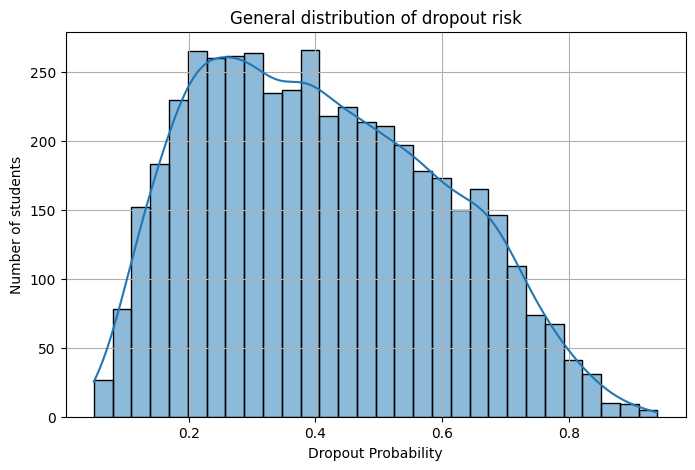

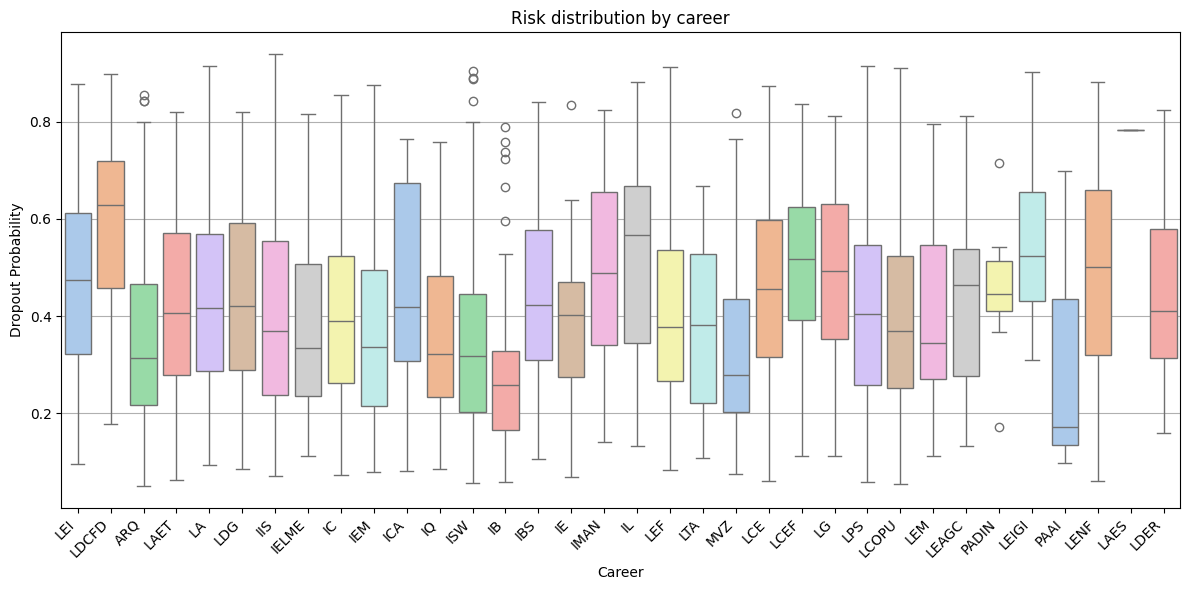

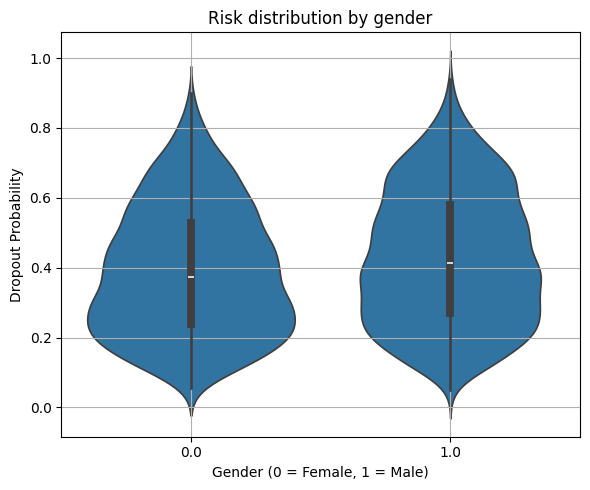

In [5]:
# Visualizaciones generales

import matplotlib.pyplot as plt
import seaborn as sns

# A. Histograma general de probabilidades
plt.figure(figsize=(8, 5))
sns.histplot(df_pred["probabilidad_desercion"], bins=30, kde=True)
plt.title("General distribution of dropout risk")
plt.xlabel("Dropout Probability")
plt.ylabel("Number of students")
plt.grid(True)
plt.show()

# B. Distribución por carrera
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_pred, x="CARRERA", y="probabilidad_desercion", hue="CARRERA", palette="pastel", legend=False)
plt.title("Risk distribution by career")
plt.ylabel("Dropout Probability")
plt.xlabel("Career")
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# C. Comparación por género
plt.figure(figsize=(6, 5))
sns.violinplot(data=df_pred, x="gender", y="probabilidad_desercion")
plt.title("Risk distribution by gender")
plt.xlabel("Gender (0 = Female, 1 = Male)")  # Ajusta según codificación
plt.ylabel("Dropout Probability")
plt.grid(True)
plt.tight_layout()
plt.show()


Top 10 carreras con mayor riesgo promedio de deserción:
  CARRERA  Riesgo_Promedio
0    LAES         0.782325
1   LDCFD         0.587218
2   LEIGI         0.560962
3      IL         0.504270
4    LCEF         0.503497
5    LENF         0.495829
6    IMAN         0.485670
7      LG         0.485572
8     LEI         0.473687
9     ICA         0.459091


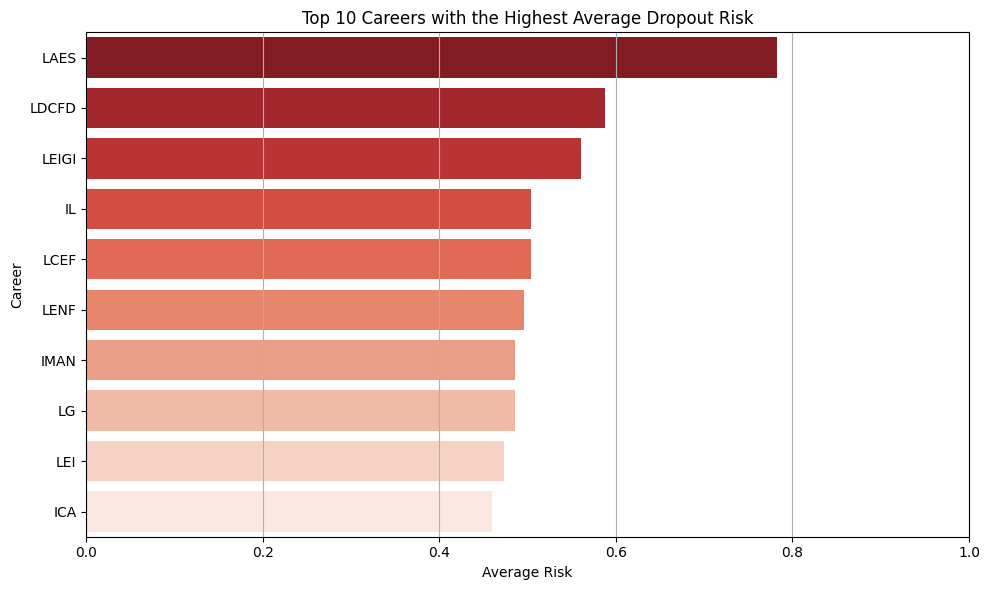

In [6]:
# Visualizaciones para desertores

import matplotlib.pyplot as plt
import seaborn as sns

df_pred[col_probabilidad]  #  Columna que tiene las predicciones

# Agrupar por carrera y calcular riesgo promedio
ranking = df_pred.groupby("CARRERA")["probabilidad_desercion"].mean().sort_values(ascending=False).reset_index()
ranking.columns = ["CARRERA", "Riesgo_Promedio"]
top10 = ranking.head(10)
print("\nTop 10 carreras con mayor riesgo promedio de deserción:")
print(top10)

# Graficar top 10
plt.figure(figsize=(10, 6))
sns.barplot(data=top10, x="Riesgo_Promedio", y="CARRERA", hue="CARRERA", palette="Reds_r")
plt.title("Top 10 Careers with the Highest Average Dropout Risk")
plt.xlabel("Average Risk")
plt.ylabel("Career")
plt.xlim(0, 1)
plt.tight_layout()
plt.grid(True, axis='x')
plt.show()

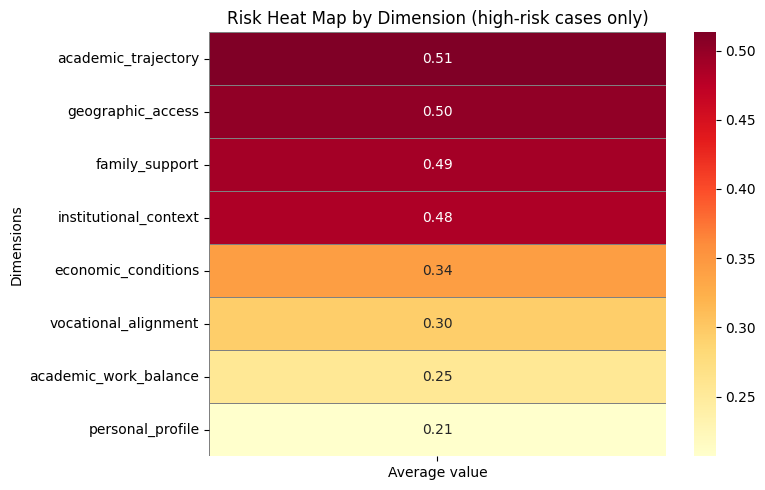

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asume que ya cargaste y limpiaste tus datos
df = df_pred.copy()

# Subconjunto de estudiantes en riesgo
df_riesgo = df[df['riesgo_predicho'] == 1]

dimensiones = {
    # Economic Conditions
    'economic_conditions': [
        'property_type_housing', 
        'goods_services_housing',
        'economic_burden',
        'economic_restriction',
        'tuition_fee',
        'financial_independence',
        'resources_academic_activities',
        'accessibility',
        'job_opportunity',
        'economic_perception_itson_parents',
        'perception_economic_terms',
        'economic constraint'
    ],

    # Academic Trajectory
    'academic_trajectory': [
        'high-school_average',
        'academic_progress_performance',
        'habits_study_participation',
        'techniques_study_organization',
        'areas_reinforcement',
        'academic_limitation',
        'conditioned_career'
    ],

    # Academic experience and Teaching Quality
    'academic_trajectory': [
        'passive teaching',
        'active-critical-learning-practices',
        'teaching_performance',
        'academic_information_received',
        'services_academic_activities',
        'physical_teaching_resources',
        'digital_teaching_resources'
    ],

    # Institutional Context and Perception
    'institutional_context': [
        'schooled_institution',
        'previous_studies_open-line',
        'public_institution',
        'private_institution',
        'cultural_activities',
        'prestige_quality',
        'institutional_recreational_services'
    ],

    # Family Support and Sociocultural Context
    'family_support': [
        'lifestyle_free_time',
        'educational_capital_father_mother',
        'housing_company',
        'academic_parental_involvement',
        'educational_parental_assessment',
        'civil_family_burden',
        'social_environment_community',
        'influence_outsiders'
    ],

    # Vocational Alignment and Decision Clarity
    'vocational_alignment': [
        'vocational_influence',
        'expectation_professional_prestige',
        'single_option',
        'uncertainty_election',
         'career_satisfaction'
    ],

    # Personal Profile and Individual Vulnerability
    'personal_profile': [
        'age',
        'gender',
        'health_condition_special_needs',
        'personal_limitation',
        'intensity_tobacco_alcohol_consumption',
        'non_drinker',
        'practice_sport',
        'desire_work_experience'
    ],

    # Geographic Access
    'geographic_access': [
        'distance_campus',
        'university_transfer_time',
        'public transport',
        'private_motorized_transport',
        'non-motorized_transport'
    ],

    # Academic–Work Balance
    'academic_work_balance': [
        'work-career_relationship',
        'public_institutional_labor_scope',
        'work_field_private_entrepreneur',
        'morning_work_shift',
        'evening_work_shift',
        'night_shift_work',
        'mixed_work_shift',
        'weekend_work_shift',
        'sporadic_work_shift',
    ]
}

# Calcular promedios por dimensión
promedios_dimensiones = {}
for dimension, columnas in dimensiones.items():
    columnas_validas = [col for col in columnas if col in df_riesgo.columns]
    if columnas_validas:
        promedios_dimensiones[dimension] = df_riesgo[columnas_validas].mean(skipna=True).mean()

# Convertir a DataFrame
df_dimensiones = pd.DataFrame.from_dict(promedios_dimensiones, orient='index', columns=['Valor promedio'])
df_dimensiones.columns = ['Average value']  
df_dimensiones.sort_values(by='Average value', ascending=False, inplace=True)

# Graficar
plt.figure(figsize=(8, 5))
sns.heatmap(df_dimensiones, annot=True, cmap='YlOrRd', linewidths=0.5, linecolor='gray', fmt=".2f")
plt.title("Risk Heat Map by Dimension (high-risk cases only)")
plt.ylabel("Dimensions")
plt.tight_layout()
plt.show()


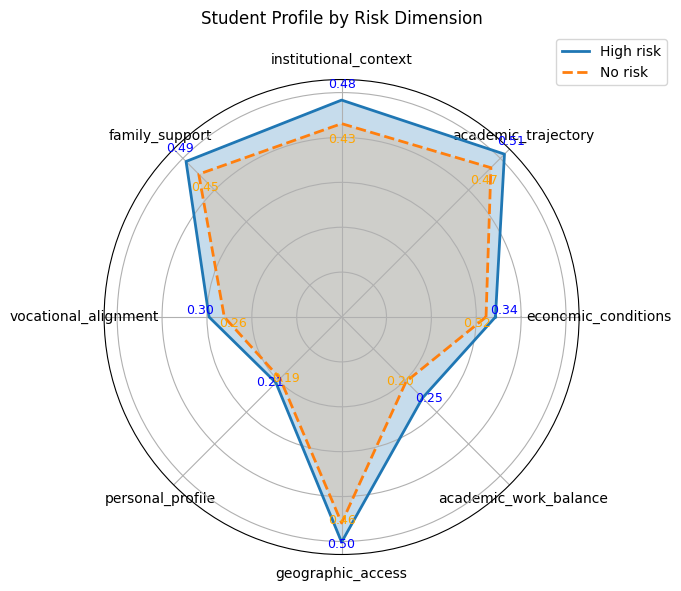

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Crear nuevo DataFrame con promedios por dimensión por estudiante
df_dimensiones_final = df.copy()

# Calcular el promedio por dimensión para cada estudiante
for dimension, columnas in dimensiones.items():
    columnas_validas = [col for col in columnas if col in df.columns]
    if columnas_validas:
        df_dimensiones_final[dimension] = df[columnas_validas].mean(axis=1, skipna=True)

# Mantener solo columnas necesarias: dimensiones + riesgo
cols_resultado = list(dimensiones.keys()) + ['riesgo_predicho']
df_dimensiones_final = df_dimensiones_final[cols_resultado].copy()
df_dimensiones_final.rename(columns={'riesgo_predicho': 'riesgo'}, inplace=True)

# ----- GRÁFICO RADAR -----
# Calcular promedios por grupo
promedios = df_dimensiones_final.groupby('riesgo')[list(dimensiones.keys())].mean()

# Etiquetas de las dimensiones
labels = list(promedios.columns)
n = len(labels)

# Valores
valores_alto = promedios.loc[1].tolist()
valores_bajo = promedios.loc[0].tolist()
valores_alto.append(valores_alto[0])
valores_bajo.append(valores_bajo[0])

# Ángulos
angles = np.linspace(0, 2 * np.pi, n, endpoint=False).tolist()
angles.append(angles[0])
labels.append(labels[0])

# Gráfico
plt.figure(figsize=(8, 6))
ax = plt.subplot(111, polar=True)

# Líneas y áreas
ax.plot(angles, valores_alto, linewidth=2, linestyle='solid', label='High risk')
ax.fill(angles, valores_alto, alpha=0.25)
ax.plot(angles, valores_bajo, linewidth=2, linestyle='dashed', label='No risk')
ax.fill(angles, valores_bajo, alpha=0.15)

# Etiquetas
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels[:-1], fontsize=10)
ax.set_yticklabels([])
ax.set_title('Student Profile by Risk Dimension', y=1.1)

# Mostrar valores promedio en el gráfico
for i in range(n):
    angle = angles[i]
    ax.text(angle, valores_alto[i] + 0.02, f"{valores_alto[i]:.2f}", color='blue', fontsize=9, ha='center', va='bottom')
    ax.text(angle, valores_bajo[i] - 0.02, f"{valores_bajo[i]:.2f}", color='orange', fontsize=9, ha='center', va='top')

# Leyenda y diseño
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()

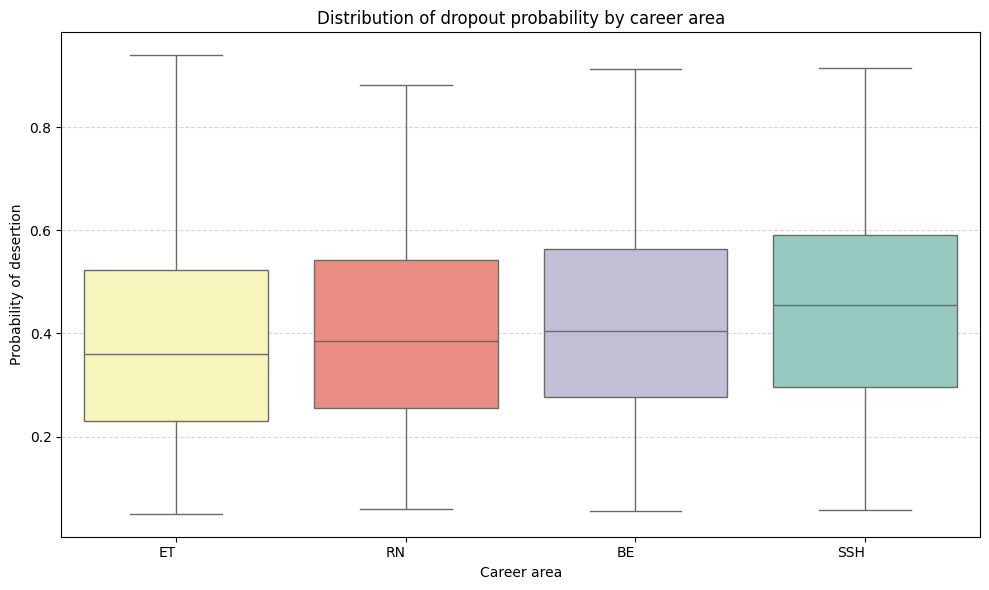

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Diccionario con abreviaciones personalizadas
abreviaciones_area = {
    'Business & Economics': 'BE',
    'Engineering and Technology': 'ET',
    'Natural Resources': 'RN',
    'Social Sciences and Humanities': 'SSH',
}

# 2. Verificar que la columna exista
if 'AREA_CARRERA' not in df.columns:
    print("Error: La columna 'AREA_CARRERA' no existe en el DataFrame.")
else:
    # 3. Filtrar casos con área conocida
    df_filtrado = df[df['AREA_CARRERA'] != 'Desconocido'].copy()

    # 4. Crear nueva columna con abreviaciones
    df_filtrado['AREA_ABREV'] = df_filtrado['AREA_CARRERA'].replace(abreviaciones_area)

    # 5. Ordenar por mediana de probabilidad
    orden_areas = df_filtrado.groupby('AREA_ABREV')['probabilidad_desercion'].median().sort_values().index

    # 6. Crear el boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(
        data=df_filtrado,
        hue='AREA_ABREV',
        x='AREA_ABREV',
        y='probabilidad_desercion',
        order=orden_areas,
        palette='Set3'
    )

    # 7. Estética del gráfico
    plt.xticks(rotation=0, ha='right')
    plt.title('Distribution of dropout probability by career area')
    plt.xlabel('Career area')
    plt.ylabel('Probability of desertion')
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=24fa97d8-6b94-4f62-a2dc-97416a953ae1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>